<a href="https://colab.research.google.com/github/lilyzhizhou/datathon-2/blob/main/Datathon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Upload Data
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular Event Dataset.csv to Cardiovascular Event Dataset.csv


In [13]:
df = pd.read_csv(io.BytesIO(uploaded['Cardiovascular Event Dataset.csv']))
df = df.drop('id', axis = 1) # drops id variable
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
# Shape of the dataframe
print(df.shape)

# List the columns of the dataframe
print(df.columns)

(5110, 11)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


- 5110 total observations

### Data Exploration

In [15]:
description = df[['age','avg_glucose_level','bmi']].describe()
description = description.drop('count')
description

,age,avg_glucose_level,bmi
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [16]:
# Check for Na values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- bmi is only variable that has missing values

In [17]:
# replace 0 with Nan for continuous variables
df[['age','avg_glucose_level','bmi']] = df[['age','avg_glucose_level','bmi']].replace(0, np.nan)

#check if missing values increased
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- How should we deal with missing bmi values?

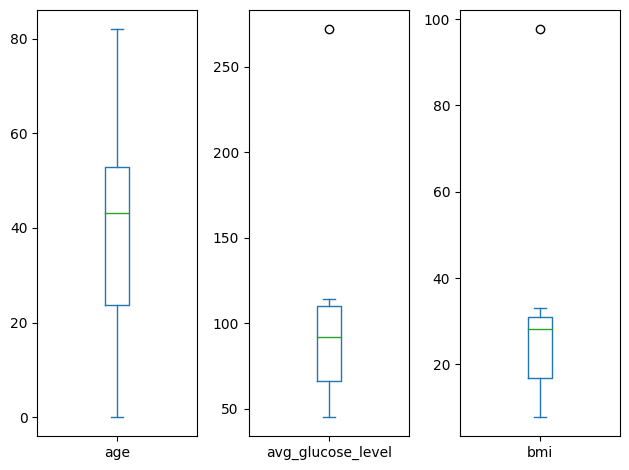

In [18]:
# Box plot of variables
description.plot(kind = 'box', subplots = True, layout = (1,3))
plt.tight_layout()
plt.show()

- look like there are some outliers for glucose_lb and bmi
- should consider removing?

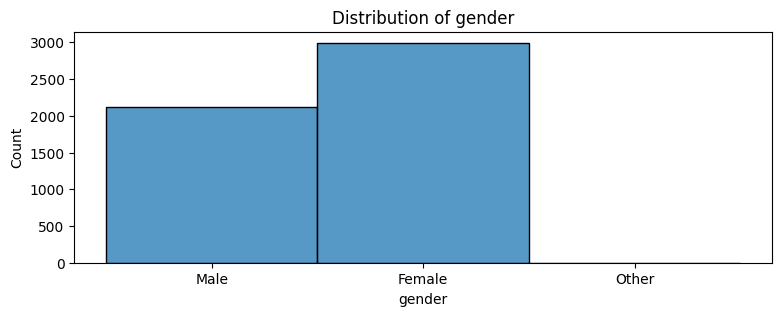

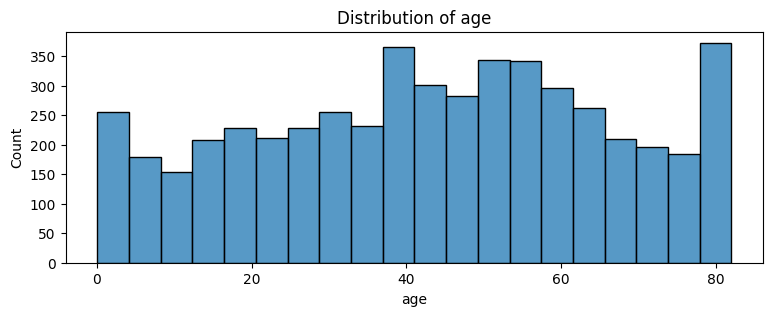

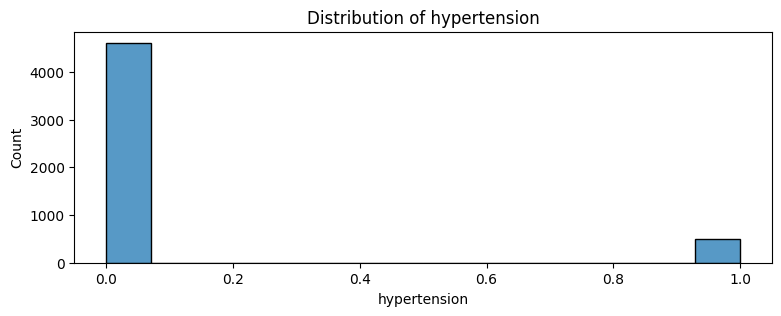

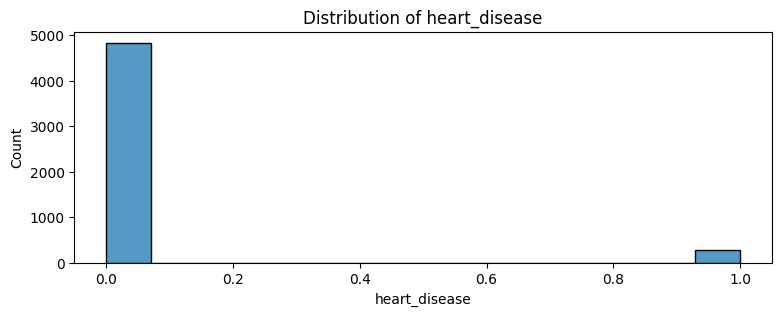

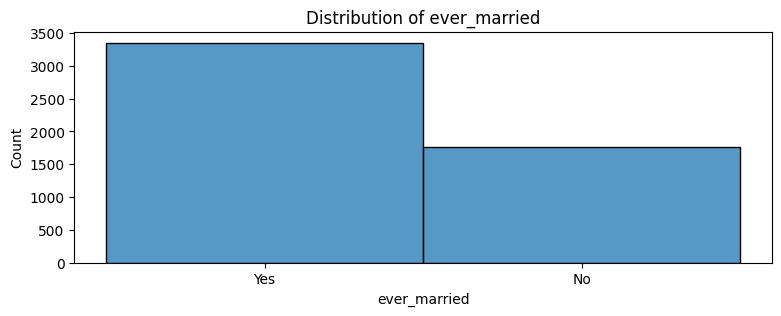

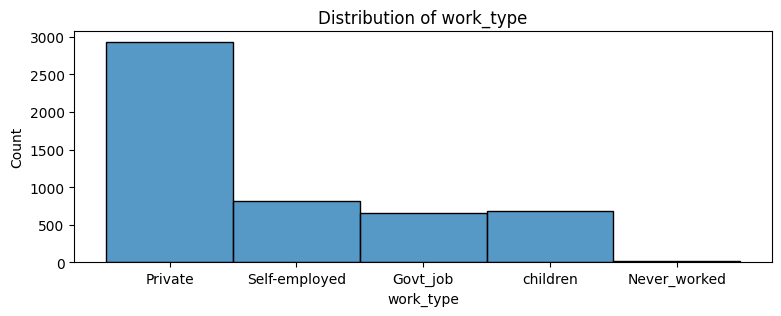

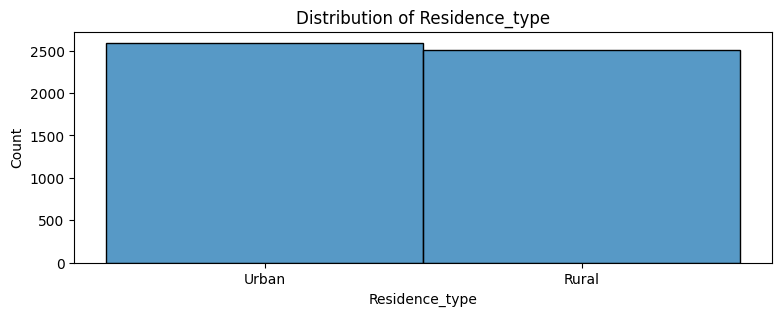

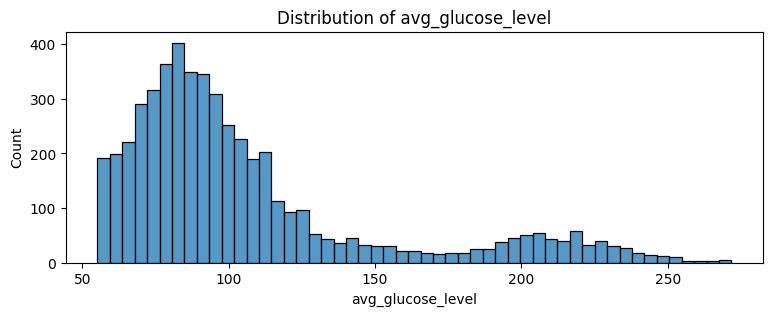

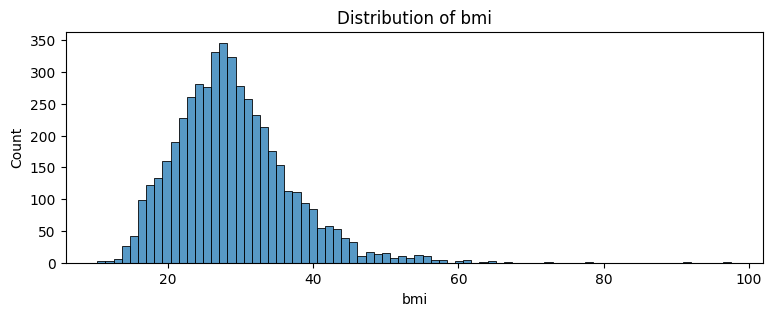

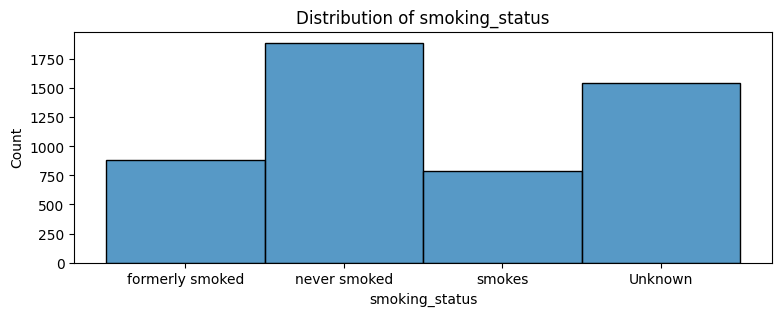

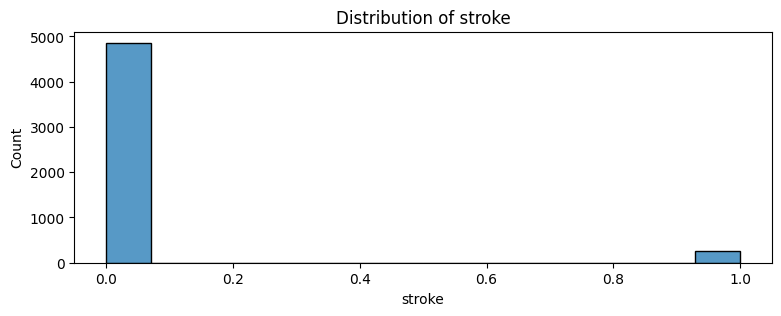

In [20]:
# Visualize histograms for all variables
for column in df.columns:
  plt.figure(figsize=(9, 3))
  sns.histplot(df[column], kde=False)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show()


- should consider excluding observations where age is very young (if we're looking at preventable factors, early stroke would not apply to these people)

In [23]:
# tally number of observations for variables with uneven distribution
column = ['gender','hypertension','heart_disease','heart_disease','stroke']

count_table = pd.DataFrame({col: df[col].value_counts() for col in column})
print(count_table.round(0))

        gender  hypertension  heart_disease  stroke
0          NaN        4612.0         4834.0  4861.0
1          NaN         498.0          276.0   249.0
Female  2994.0           NaN            NaN     NaN
Male    2115.0           NaN            NaN     NaN
Other      1.0           NaN            NaN     NaN


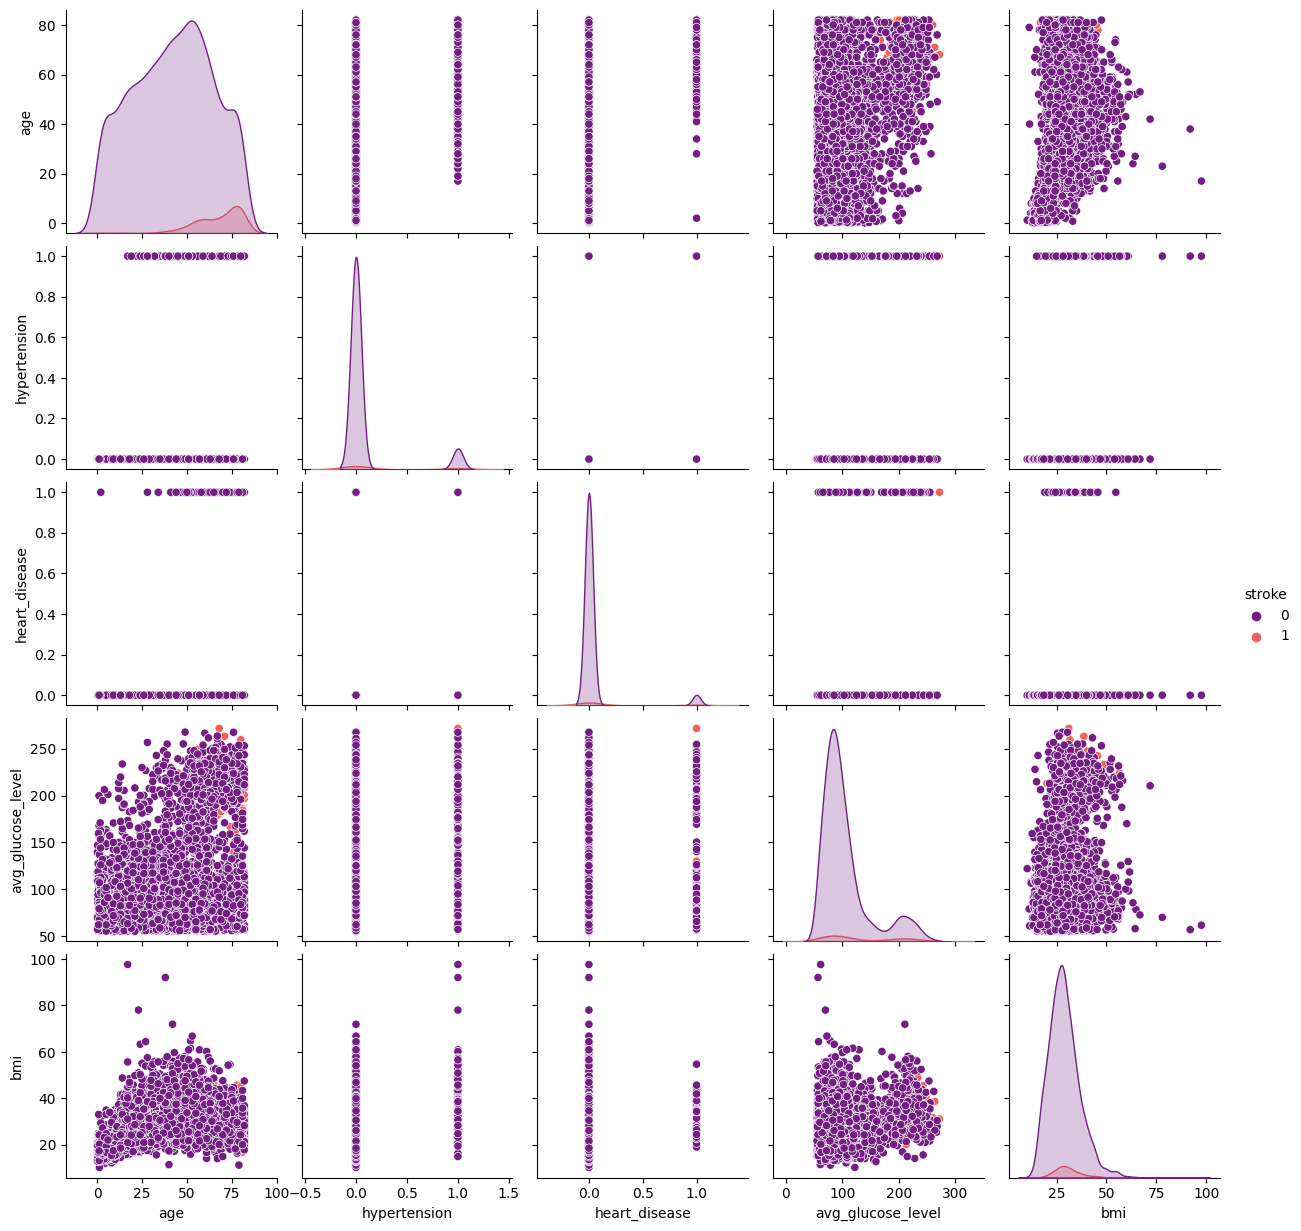

In [19]:
# Pair plot for data visualization
sns.pairplot(df, hue='stroke', palette="magma")
plt.show()

### Data Preparation

In [ ]:
# Clean and filter data


In [ ]:
# 1. Split data into predictor and outcome variable
X = df.drop('stroke', axis = 1)
Y = df['stroke']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Building Logistic Regression Model

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)